In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

#Transformer

#from tensorflow.keras.transformer import Transformer

#from tensorflow.keras.layers.experimental.preprocessing import TransformerBlock
from tensorflow.keras.layers import Dense, Dropout, Embedding, Input, Concatenate, MultiHeadAttention


In [7]:
import pandas as pd

# Chargement du jeu de données
data = pd.read_csv("../data/BenignAndMaliciousDataset.csv")

In [8]:
# Séparation des fonctionnalités et de la cible
X = data[['DNSRecordType', 'NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio', 'RegisteredOrg']]
y = data['Class']

In [9]:
#avant l'encodage

numeric_features = ['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio','SubdomainNumber']
print (data[numeric_features])
print("Avant l'encodage: \n")

#Avant l'encodage de l'attribut categroriciel

categorical_feature1 = data['DNSRecordType']
categorical_feature2 = data['RegisteredOrg']

print("Features 1: \n")
print(categorical_feature1)

print("Features 2: \n")
print(categorical_feature2)

       NumericSequence  NumericRatio  StrangeCharacters  ConsoantRatio   
0                    1           0.1                 11            0.6  \
1                    2           0.1                 11            0.7   
2                    3           0.2                 24            0.6   
3                    2           0.1                 15            0.6   
4                    2           0.2                 23            0.6   
...                ...           ...                ...            ...   
89995                2           0.2                  3            0.5   
89996                0           0.0                  0            0.6   
89997                2           0.1                  1            0.5   
89998                0           0.0                  0            0.5   
89999                0           0.0                  1            0.6   

       SubdomainNumber  
0                    0  
1                    0  
2                    0  
3          

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#prepocessing des features numeriques soit  avec le  LabelEncoder soit le MinMaxScaler()

# Sélection des fonctionnalités numériques
numeric_features = data[['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio','SubdomainNumber']]

# Création d'un scaler
scaler = MinMaxScaler()

# Ajustement du scaler aux données
scaler.fit(numeric_features)

# Transformation des fonctionnalités numériques
scaled_numeric_features = scaler.transform(numeric_features)

In [11]:
# Apres transformation Création d' un DataFrame à partir des valeurs transformées

scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns)

# Afficher le DataFrame avec les valeurs transformées
print("Après transformation")
print(scaled_df)

total_size = scaled_df.shape

print("Taille totale des caracteristiques numeriques apres concatenations :", total_size)

Après transformation
       NumericSequence  NumericRatio  StrangeCharacters  ConsoantRatio   
0             0.022222         0.125           0.088710            0.6  \
1             0.044444         0.125           0.088710            0.7   
2             0.066667         0.250           0.193548            0.6   
3             0.044444         0.125           0.120968            0.6   
4             0.044444         0.250           0.185484            0.6   
...                ...           ...                ...            ...   
89995         0.044444         0.250           0.024194            0.5   
89996         0.000000         0.000           0.000000            0.6   
89997         0.044444         0.125           0.008065            0.5   
89998         0.000000         0.000           0.000000            0.5   
89999         0.000000         0.000           0.008065            0.6   

       SubdomainNumber  
0                  0.0  
1                  0.0  
2              

In [12]:
#je tokenrise d'abord les attribut categoriciel

from tensorflow.keras.preprocessing.text import Tokenizer


#la  tokenrisation s'applique sur une listte de chaine de caractere et non sur une serie pandas to je fais un casting [.tolist()]

categorical_feature1 = data['DNSRecordType'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères
categorical_feature2 = data['RegisteredOrg'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères

#combinaison avec separateur  comme on peut le faire directement

tokenizer3 = Tokenizer(num_words= 10)


# Concaténation des features textuelles avec un séparateur
combined_text = [f"{feat1} SEPARATOR {feat2}" for feat1, feat2 in zip(categorical_feature1, categorical_feature2)]

# Tokenisation des textes combinés
tokenizer3 = Tokenizer(num_words=10)
tokenizer3.fit_on_texts(combined_text)
tokens = tokenizer3.texts_to_sequences(combined_text)


print("Tokens feature 1 + Tokens feature 2")
print(tokens)

print("Calcul des longueur de sequence \n")

seq_lengths = [len(x) for x in tokens]

print(seq_lengths)

Tokens feature 1 + Tokens feature 2
[[2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1], [2, 1, 4], [2, 1], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1], [2, 1], [2, 1], [2, 1], [2, 1], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], 

In [13]:
#Calcule des statistique descriptive sur les longueur des sequences

mean_length = np.mean(seq_lengths)
max_length = np.max(seq_lengths)
min_length = np.min(seq_lengths)
std_dev = np.std(seq_lengths)


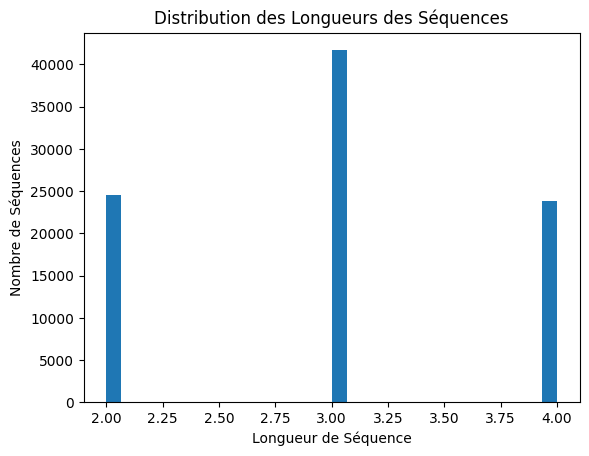

In [14]:
# Visualisation de la distribution des longueurs des séquences
import matplotlib.pyplot as plt
plt.hist(seq_lengths, bins=30)
plt.xlabel('Longueur de Séquence')
plt.ylabel('Nombre de Séquences')
plt.title('Distribution des Longueurs des Séquences')
plt.show()


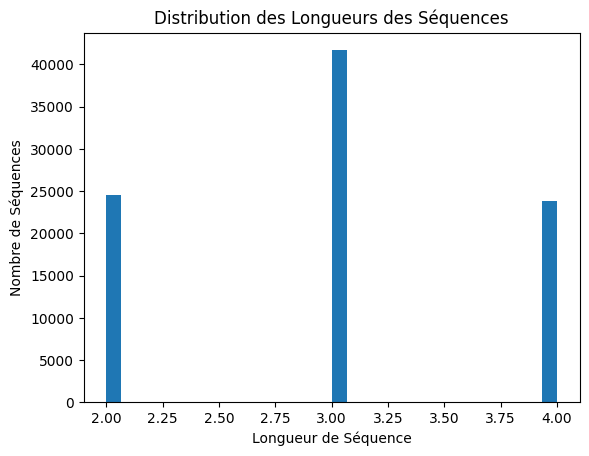

In [15]:
# Visualisation de la distribution des longueurs des séquences
import matplotlib.pyplot as plt
plt.hist(seq_lengths, bins=30)
plt.xlabel('Longueur de Séquence')
plt.ylabel('Nombre de Séquences')
plt.title('Distribution des Longueurs des Séquences')
plt.show()


In [16]:
# Hyperparamètres et dimensions des données*
taille_num_features = 5
taille_text_features = 4 # je donne la taille max parmi les longueur des sequences
vocab_size = 20000  
embedding_dim = 128  

In [17]:
# Entrées
input_num = layers.Input(shape=(taille_num_features,))
input_text = layers.Input(shape=(taille_text_features,))


In [18]:
# Branches du modèle
# Branche numérique - FFN

num_branch = layers.Dense(64, activation='relu')(input_num)
num_branch = layers.Dense(32, activation='relu')(num_branch)


In [19]:

# Branche textuelle - Embedding + Transformer

text_branch = Embedding(vocab_size, embedding_dim, input_length=taille_text_features)(input_text)
# text_branch = Transformer(d_model=embedding_dim, num_heads=2, num_layers=2, dropout=0.2)(text_branch)


attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
attention_output = attention(text_branch, text_branch)
flatten = tf.keras.layers.Flatten()(attention_output)

In [ ]:
input_numeric = Input(shape=(taille_num_features,))
concatenated = Concatenate()([flatten, input_numeric])

dense1 = Dense(256, activation='relu')(concatenated)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

output = Dense(1, activation='sigmoid')(dropout2)

model = Model(inputs=[input_text, input_numeric], outputs=output)

In [20]:
# Fusion des branches 

## Changer l'axe si nécessaire avec axis = -1 ou 1 pour ordonné e et abscisse 
# merged = layers.concatenate([num_branch, text_branch])

merged = layers.concatenate([num_branch, flatten])


#autre forme de fusion a explorer (addition[add()], multiplication[multiply()],soustraction[subtract()],)

# merged = layers.add([num_branch, text_branch])
# merged = layers.subtract([num_branch, text_branch])
# merged = layers.multiply([num_branch, text_branch])



#utilisation de la couche Dense apres concatenantion cas de l'usage de [concatenante()]


In [21]:
# Couches supplémentaires après la fusion
merged = layers.Dropout(0.5)(merged)
merged = layers.Dense(16, activation='relu')(merged)

output = layers.Dense(1, activation='sigmoid')(merged)


In [22]:
# Création et compilation du modèle
model = Model(inputs=[input_num, input_text], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Création et compilation du modèle
model = Model(inputs=[input_num, input_text], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# data_num = data[['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio']]
# data_text = data[['DNSRecordType','RegisteredOrg']]
labels = data['Class']

# Entrées pour l'entraînement
data_num = scaled_numeric_features  
# data_text = np.array(tokens)  
data_text = pad_sequences(tokens, maxlen=max_length,padding='post')



In [25]:
# Assurez-vous que les données numériques sont correctes
print("Shape of data_num:", data_num.shape)

# Assurez-vous que les données textuelles sont correctes après le rembourrage
print("Shape of data_text:", data_text.shape)

# Assurez-vous que les étiquettes sont correctes
print("Shape of labels:", labels.shape)

# NB utiliser le resultat obtenu pour modifier les tailles ou dimension de mes entrées definie plus haut



Shape of data_num: (90000, 5)
Shape of data_text: (90000, 4)
Shape of labels: (90000,)


In [26]:
#maintenant on va divisser les donnee en deux [entrainenemt et text]

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text, data_num, y, test_size=0.2, random_state=42
)

In [27]:
print("Shape of text_train:", text_train.shape)
print("Shape of labels_train:", labels_train.shape)
print("Shape of text_test:", text_test.shape)
print("Shape of labels_test:", labels_test.shape)
print("Shape of num_train:", num_train.shape)
print("Shape of num_test:", num_test.shape)

print("Visualisation des dimension et du batch_size\n")

batch_size, dimension = text_train.shape[0], text_train.shape[1]
print("Batch size text train:", batch_size)
print("Dimension text train:", dimension)

batch_size, dimension = num_train.shape[0], num_train.shape[1]
print("Batch size num train:", batch_size)
print("Dimension num train:", dimension)



Shape of text_train: (72000, 4)
Shape of labels_train: (72000,)
Shape of text_test: (18000, 4)
Shape of labels_test: (18000,)
Shape of num_train: (72000, 5)
Shape of num_test: (18000, 5)
Visualisation des dimension et du batch_size

Batch size text train: 72000
Dimension text train: 4
Batch size num train: 72000
Dimension num train: 5


In [28]:
history = model.fit([num_train,text_train], labels_train, epochs=4, batch_size=32, validation_data=([num_test,text_test], labels_test))


Epoch 1/4
2250/2250 [==============================] - 207s 89ms/step - loss: 0.0737 - accuracy: 0.9678 - val_loss: 0.0339 - val_accuracy: 0.9874
Epoch 2/4
2250/2250 [==============================] - 193s 86ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0302 - val_accuracy: 0.9888
Epoch 3/4
2250/2250 [==============================] - 197s 88ms/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.0312 - val_accuracy: 0.9874
Epoch 4/4
2250/2250 [==============================] - 205s 91ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0241 - val_accuracy: 0.9926


In [29]:
#on effectue les prediction sur les donnees de test

y_pred = model.predict([num_test,text_test])

print(y_pred)

563/563 [==============================] - 3s 5ms/step
[[1.6986058e-04]
 [9.9999934e-01]
 [9.9999994e-01]
 ...
 [9.9999994e-01]
 [2.3224191e-05]
 [9.9999928e-01]]


In [30]:
# necessaire pour afficher la matrix de confusion car a besoin que la probabilité retourner pqr lq fonction sigmoid soir saoit 0 ou 1 pour travailler dessus

y_pred = np.round(y_pred)

In [31]:
# Évaluation du modèle sur les données de test
evaluation_results = model.evaluate([num_test, text_test], labels_test)
# loss, accuracy = model.evaluate([num_test, text_test], labels_test)


# Affichage des résultats

# print(f'Accuracy: {accuracy}, Loss: {loss}')
print("Perte sur les données de test:", evaluation_results[0])
print("Précision sur les données de test:", evaluation_results[1])


563/563 [==============================] - 3s 5ms/step - loss: 0.0241 - accuracy: 0.9926
Perte sur les données de test: 0.024102114140987396
Précision sur les données de test: 0.992555558681488


In [ ]:
# Extraction des métriques d'entraînement
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Affichage des courbes de perte et d'exactitude séparément
epochs = range(1, len(loss) + 1)

In [ ]:
#je separe les schema individuellement pour une bonne lisibileté

# Courbe de perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'r', label='Perte de validation')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

In [ ]:
# Courbe de perte

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
# Courbe d'exactitude
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'g', label='Exactitude d\'entraînement')
plt.plot(epochs, val_accuracy, 'r', label='Exactitude de validation')
plt.title('Courbe d\'Exactitude')
plt.xlabel('Épochs')
plt.ylabel('Exactitude')
plt.legend()

plt.show()

In [ ]:
# je use une courbe pour afficher tout les 4 courbes

# Afficher les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
#affichage de la matrixe de confusion

import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix


#calul preliminaire pour obtenir la matrice de confusion

conf_matrix = confusion_matrix(labels_test,y_pred)
true_negatives, false_positives,false_negatives, true_positives = conf_matrix.ravel()

# Créer la matrice de confusion
conf_matrix = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

# Afficher la matrice de confusion avec seaborn
df_cm = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
#Courbe de ROC

from sklearn.metrics import roc_curve, roc_auc_score

# Calcul des taux FPR et TPR
fpr, tpr, thresholds = roc_curve(labels_test, y_pred)

# Plotter la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred)
print('Aire sous la courbe (AUC) :', auc)
